# Import Thư Viện

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc Dữ Liệu

In [2]:
df = pd.read_csv(r'Data RFM.csv')
df.head()

,SaleOrder Key,CustomerKey,Date,Sales Amount
0,SO43697,21768,7/1/2017,3578.27
1,SO43698,28389,7/1/2017,3399.99
2,SO43699,25863,7/1/2017,3399.99
3,SO43700,14501,7/1/2017,699.10
4,SO43701,11003,7/1/2017,3399.99


# Describe Dữ Liệu

In [3]:
df.describe()

,CustomerKey,Sales Amount
count,60398.000000,60398.000000
mean,18841.685420,486.086922
std,5432.430404,928.489878
min,11000.000000,2.290000
25%,14003.000000,7.950000
50%,18143.000000,29.990000
75%,23429.750000,539.990000
max,29483.000000,3578.270000


# Thông Tin Dữ Liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleOrder Key  60398 non-null  object 
 1   CustomerKey    60398 non-null  int64  
 2   Date           60398 non-null  object 
 3   Sales Amount   60398 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


# Kiểm Tra Dữ Liệu Missing Data

In [5]:
Df_null = df.isnull().sum()
Df_null = pd.DataFrame(Df_null,columns = ['number']).sort_values(by='number',ascending=False)
Df_null.reset_index(inplace=True)
Df_null.head(10)

,index,number
0,SaleOrder Key,0
1,CustomerKey,0
2,Date,0
3,Sales Amount,0


Nhận thấy không có dữ liệu null

# Tính Giá Trị RFM

In [6]:
import datetime
df['Date'] = pd.to_datetime(df['Date']) #String->Date
current_date = max(df['Date']) + datetime.timedelta(days=1)

# Group by CustomerKey to calculate R,F,M
rfm = df.groupby(['CustomerKey']).agg({'Date': lambda x: (current_date - x.max()).days,'SaleOrder Key':'nunique','Sales Amount':'sum'})
rfm.rename(columns={'Date':'Recency','SaleOrder Key':'Frequency','Sales Amount':'Monetary'}, inplace=True)
rfm.head(10)

,Recency,Frequency,Monetary
CustomerKey,,,
11000,256,3,8248.99
11001,35,3,6383.88
11002,325,3,8114.04
11003,249,3,8139.29
11004,258,3,8196.01
11005,257,3,8121.33
11006,245,3,8119.03
11007,301,3,8211.00
11008,318,3,8106.31


In [7]:
rfm

,Recency,Frequency,Monetary
CustomerKey,,,
11000,256,3,8248.99
11001,35,3,6383.88
11002,325,3,8114.04
11003,249,3,8139.29
11004,258,3,8196.01
...,...,...,...
29479,497,1,2049.10
29480,181,1,2442.03
29481,885,1,3374.99


In [8]:
def plot_Hist(features, df):
    plt.rcParams["figure.figsize"] = (15,5)
    fig, axs = plt.subplots(1, len(features))
    cnt = 0
    for i in range(len(features)):
        axs[i].hist(df[features[cnt]])
        axs[i].set_title('Distribution of '+ features[cnt])
        cnt +=1

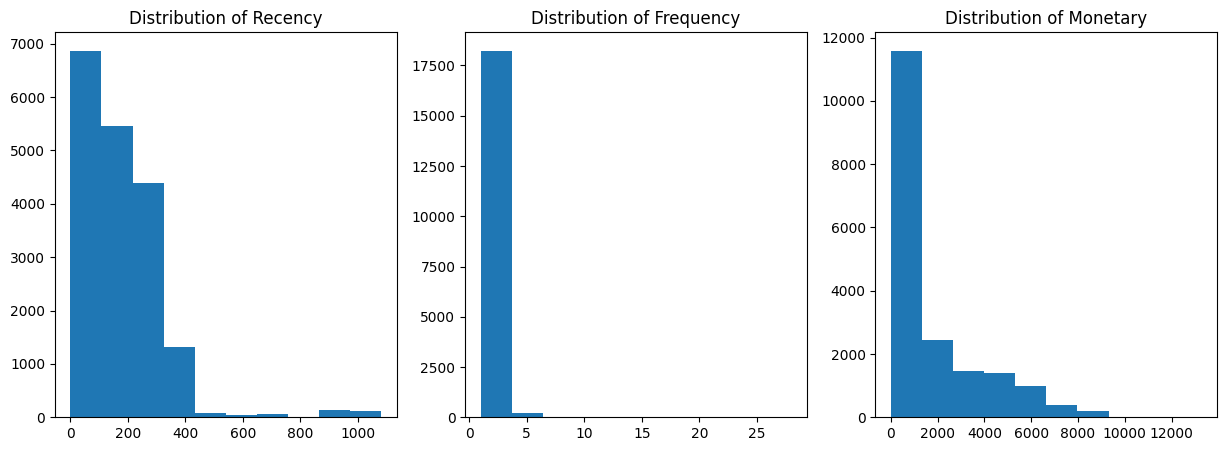

In [9]:
features = ['Recency', 'Frequency', 'Monetary']
plot_Hist(features, rfm)

In [10]:
rfm["RecencyScore"]  = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerKey,,,,,,
11000,256,3,8248.99,2,5,5
11001,35,3,6383.88,5,5,5
11002,325,3,8114.04,1,5,5
11003,249,3,8139.29,2,5,5
11004,258,3,8196.01,2,5,5
...,...,...,...,...,...,...
29479,497,1,2049.10,1,4,4
29480,181,1,2442.03,3,4,4
29481,885,1,3374.99,1,4,5


Tính Score

In [11]:
def Score_rfm_k(x) : return (0.15*(x['RecencyScore']) + 0.28 *(x['FrequencyScore']) + 0.57*(x['MonetaryScore']))
rfm['score'] = rfm.apply(Score_rfm_k,axis=1 )
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,score
CustomerKey,,,,,,,
11000,256,3,8248.99,2,5,5,4.55
11001,35,3,6383.88,5,5,5,5.00
11002,325,3,8114.04,1,5,5,4.40
11003,249,3,8139.29,2,5,5,4.55
11004,258,3,8196.01,2,5,5,4.55


In [12]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,score
CustomerKey,,,,,,,
11000,256,3,8248.99,2,5,5,4.55
11001,35,3,6383.88,5,5,5,5.00
11002,325,3,8114.04,1,5,5,4.40
11003,249,3,8139.29,2,5,5,4.55
11004,258,3,8196.01,2,5,5,4.55
...,...,...,...,...,...,...,...
29479,497,1,2049.10,1,4,4,3.55
29480,181,1,2442.03,3,4,4,3.85
29481,885,1,3374.99,1,4,5,4.12


C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\2560241934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['RecencyScore'])


<Axes: xlabel='RecencyScore', ylabel='Density'>

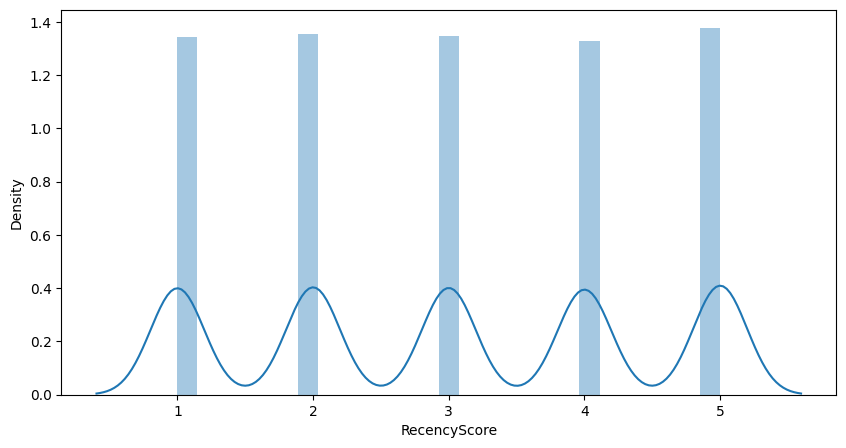

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(rfm['RecencyScore'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\129474239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['FrequencyScore'])


<Axes: xlabel='FrequencyScore', ylabel='Density'>

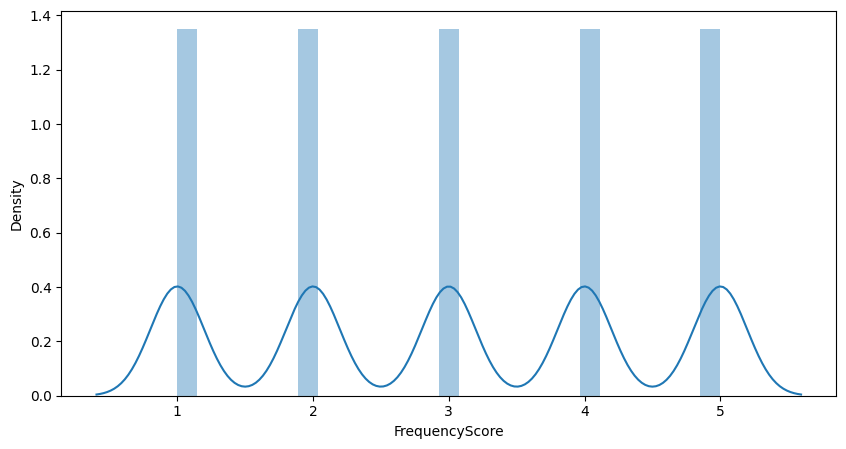

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(rfm['FrequencyScore'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\1117549976.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['MonetaryScore'])


<Axes: xlabel='MonetaryScore', ylabel='Density'>

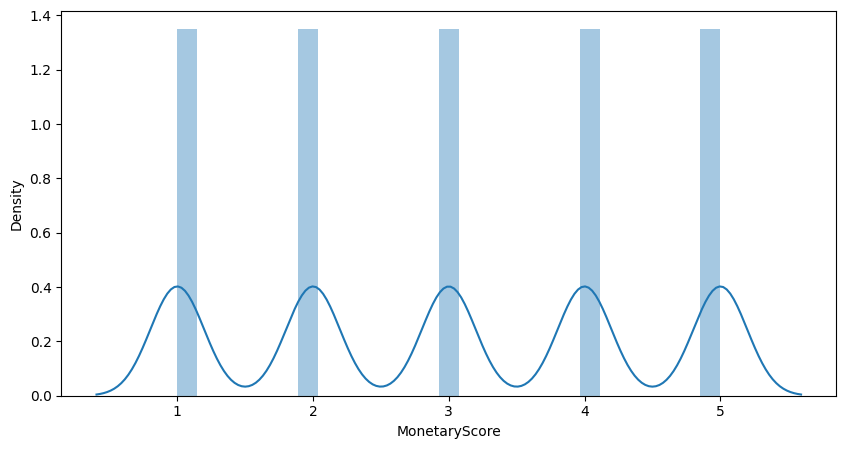

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(rfm['MonetaryScore'])

In [16]:
rfm["Label"] = np.where(rfm['score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm['score'] > 4,
                                        "High value Customers",
                                        (np.where(
    rfm['score'] > 3,
                             "Medium Value Customers",
                             np.where(rfm['score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm[['RecencyScore',	'FrequencyScore',	'MonetaryScore','score', 'Label']].head(10)

,RecencyScore,FrequencyScore,MonetaryScore,score,Label
CustomerKey,,,,,
11000,2,5,5,4.55,Top Customers
11001,5,5,5,5.00,Top Customers
11002,1,5,5,4.40,High value Customers
11003,2,5,5,4.55,Top Customers
11004,2,5,5,4.55,Top Customers
11005,2,5,5,4.55,Top Customers
11006,2,5,5,4.55,Top Customers
11007,1,5,5,4.40,High value Customers
11008,1,5,5,4.40,High value Customers


C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\2688146653.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['score'])


<Axes: xlabel='score', ylabel='Density'>

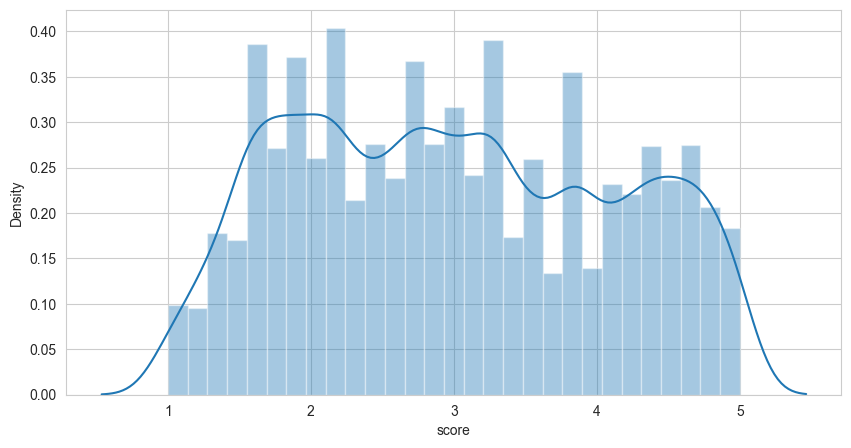

In [17]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(rfm['score'])

In [18]:
# Group by Label và Monetary

In [19]:
rfm_l_m = rfm.groupby(['Label'])['Monetary'].sum()
rfm_l_m

Label
High value Customers       7294489.91
Lost Customers               60789.57
Low Value Customers        1939684.02
Medium Value Customers     7075249.56
Top Customers             12988464.83
Name: Monetary, dtype: float64

array([<Axes: title={'center': 'Monetary'}, ylabel='Monetary'>],
      dtype=object)

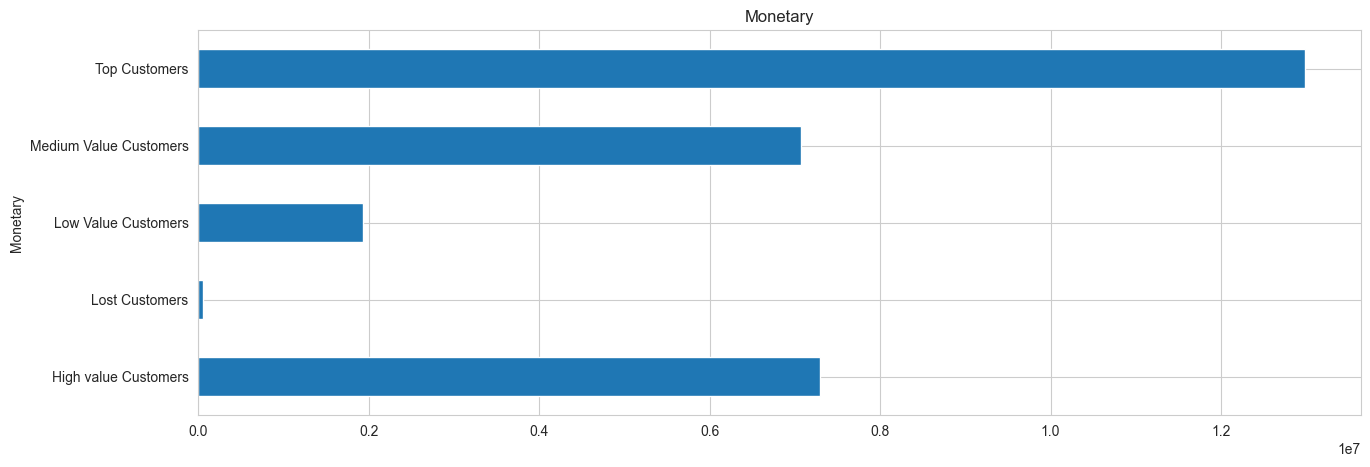

In [20]:
rfm_l_m.plot.barh(subplots=True,ylabel='Monetary')

In [21]:
round(rfm.Label.value_counts(normalize=True)*100,0)

Label
Low Value Customers       39.0
Medium Value Customers    26.0
Lost Customers            13.0
Top Customers             12.0
High value Customers      10.0
Name: proportion, dtype: float64

In [22]:
rfm.groupby('Label').agg(
    {
        "Recency":"mean",
        "Frequency":"mean",
        "Monetary":"mean",
    })

,Recency,Frequency,Monetary
Label,,,
High value Customers,220.015667,2.109670,3940.837337
Lost Customers,221.008027,1.000000,25.682117
Low Value Customers,170.490484,1.074027,271.436331
Medium Value Customers,175.325244,1.675171,1467.589620
Top Customers,110.093084,2.451501,5649.614976


In [23]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,score,Label
CustomerKey,,,,,,,,
11000,256,3,8248.99,2,5,5,4.55,Top Customers
11001,35,3,6383.88,5,5,5,5.00,Top Customers
11002,325,3,8114.04,1,5,5,4.40,High value Customers
11003,249,3,8139.29,2,5,5,4.55,Top Customers
11004,258,3,8196.01,2,5,5,4.55,Top Customers
...,...,...,...,...,...,...,...,...
29479,497,1,2049.10,1,4,4,3.55,Medium Value Customers
29480,181,1,2442.03,3,4,4,3.85,Medium Value Customers
29481,885,1,3374.99,1,4,5,4.12,High value Customers


# Biểu đồ thể hiện theo phân khúc khách hàng

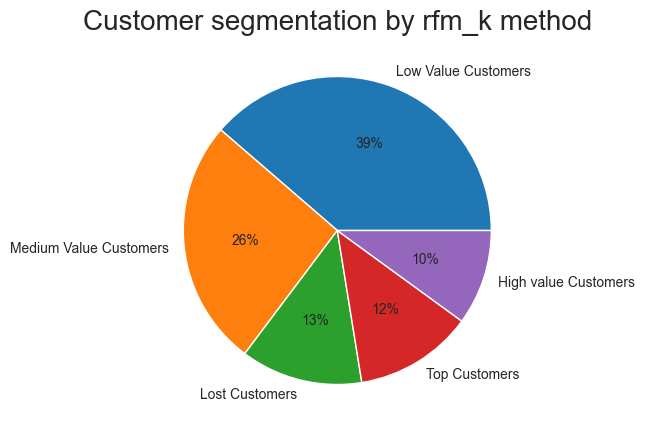

In [24]:
# một biểu đồ hình tròn để hiển thị tất cả các phân khúc khách hàng.
fig = plt.pie(rfm.Label.value_counts(), labels=rfm.Label.value_counts().index,autopct='%.0f%%')
plt.title('Customer segmentation by rfm_k method', fontsize=20)
plt.set_cmap('winter')

# K-Means

In [25]:
# sao chép dữ liệu vào biến mới
rfm_k = rfm.copy()
# chỉ lấy các cột có liên quan
rfm_k= rfm.iloc[:,:3]
rfm_k.head()

,Recency,Frequency,Monetary
CustomerKey,,,
11000,256,3,8248.99
11001,35,3,6383.88
11002,325,3,8114.04
11003,249,3,8139.29
11004,258,3,8196.01


In [26]:
rfm.Recency.describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

count    18484.000000
mean       175.667983
std        145.644062
min          1.000000
5%          16.000000
25%         72.000000
50%        154.000000
75%        249.000000
95%        349.000000
max       1081.000000
Name: Recency, dtype: float64

In [27]:
rfm.Frequency.describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

count    18484.000000
mean         1.496375
std          1.101139
min          1.000000
5%           1.000000
25%          1.000000
50%          1.000000
75%          2.000000
95%          3.000000
max         28.000000
Name: Frequency, dtype: float64

In [28]:
rfm.Monetary.describe(percentiles = [0.05,0.25,0.5,0.75,0.95])

count    18484.000000
mean      1588.329252
std       2124.231713
min          2.290000
5%           7.280000
25%         49.970000
50%        270.265000
75%       2511.275000
95%       6021.620000
max      13295.380000
Name: Monetary, dtype: float64

# Lọc outlier

In [29]:
# Xóa outliers for Monetary
Q1 = rfm_k.Monetary.quantile(0.05)
Q3 = rfm_k.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_k = rfm_k[(rfm_k.Monetary >= Q1 - 1.5*IQR) & (rfm_k.Monetary <= Q3 + 1.5*IQR)]

# Xóa outliers for Recency
Q1 = rfm_k.Recency.quantile(0.05)
Q3 = rfm_k.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_k = rfm_k[(rfm_k.Recency >= Q1 - 1.5*IQR) & (rfm_k.Recency <= Q3 + 1.5*IQR)]

# Xóa outliers for Frequency
Q1 = rfm_k.Frequency.quantile(0.05)
Q3 = rfm_k.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_k = rfm_k[(rfm_k.Frequency >= Q1 - 1.5*IQR) & (rfm_k.Frequency <= Q3 + 1.5*IQR)]

In [30]:
rfm_k

,Recency,Frequency,Monetary
CustomerKey,,,
11000,256,3,8248.99
11001,35,3,6383.88
11002,325,3,8114.04
11003,249,3,8139.29
11004,258,3,8196.01
...,...,...,...
29478,202,1,2398.05
29479,497,1,2049.10
29480,181,1,2442.03


In [31]:
# sao chép dữ liệu vào biến mới
rfm = rfm_k.copy()
# chỉ lấy các cột có liên quan
rfm.head()
rfm

,Recency,Frequency,Monetary
CustomerKey,,,
11000,256,3,8248.99
11001,35,3,6383.88
11002,325,3,8114.04
11003,249,3,8139.29
11004,258,3,8196.01
...,...,...,...
29478,202,1,2398.05
29479,497,1,2049.10
29480,181,1,2442.03


# Kiểm tra sự phân phối của các biến

C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\3687826381.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_k['Recency'], ax = ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\3687826381.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_k['Frequency'], ax = ax[1])


C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\3687826381.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_k['Monetary'], ax = ax[2])


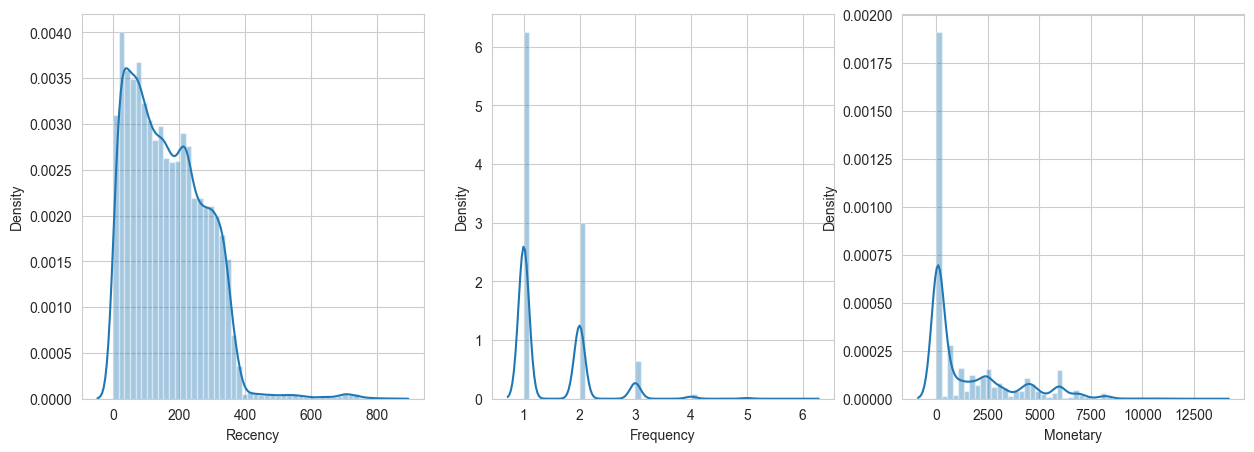

In [32]:
# Draw charts to check the shape of the data
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(rfm_k['Recency'], ax = ax[0])
sns.distplot(rfm_k['Frequency'], ax = ax[1])
sns.distplot(rfm_k['Monetary'], ax = ax[2])
plt.show()

In [33]:
# Analyze Skewness
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_k[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_k[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_k[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_k[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm_k[x].skew().round(2))
    print(np.log(rfm_k[x]).skew().round(2))   #Log transformation
    print(np.sqrt(rfm_k[x]).skew().round(2))  #SQRT transformation
    print(pd.Series(stats.boxcox(rfm_k[x])[0]).skew().round(2)) #Boxcox transformation

C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\11743736.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_k[x], ax=ax[0,0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\11743736.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_k[x]), ax=ax[0,1])
C:\Users\ACER\AppData\Lo

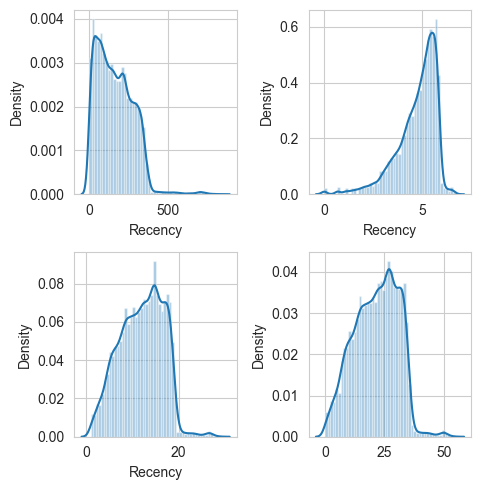

0.86
-1.42
-0.12
-0.13


In [34]:
analyze_skewness('Recency')

Nhận thấy Box cox tranformation cho giá trị bằng 0 ---> Chọn Box cox transformation

C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\11743736.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_k[x], ax=ax[0,0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\11743736.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_k[x]), ax=ax[0,1])
C:\Users\ACER\AppData\Lo

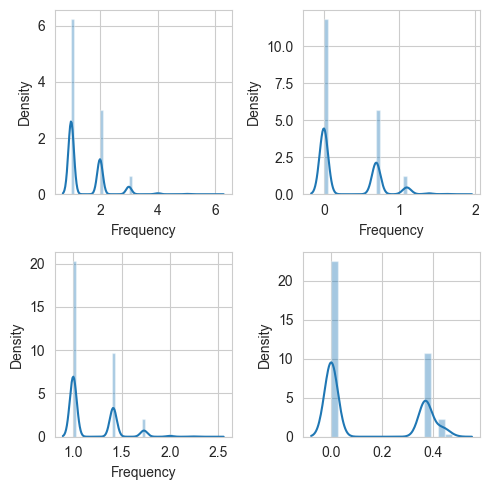

1.57
0.86
1.12
0.54


In [35]:
analyze_skewness('Frequency')

Nhận thấy Box cox tranformation cho giá trị bằng 0.56

C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\11743736.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_k[x], ax=ax[0,0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_21248\11743736.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_k[x]), ax=ax[0,1])
C:\Users\ACER\AppData\Lo

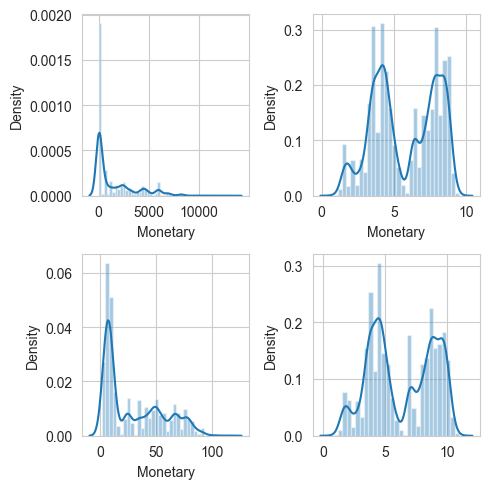

1.44
-0.09
0.72
-0.03


In [36]:
analyze_skewness('Monetary')

Nhận thấy Box cox tranformation cho giá trị bằng -0.04 là giá trị gần 0 

Bởi vì Data Standardization chỉ phù hợp khi dữ liệu là dữ liệu chuẩn, sau khi kiểm tra các phương pháp chuyển đổi dữ liệu thì không có phương pháp nào chuyển đổi dữ liệu của F và M về phân phối chuẩn. Chính vì vậy, chúng em sẽ dùng data normalization để scaling dữ liệu

# Scaling dữ liệu

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit_transform
rfm_k['minmax_R'] = scaler.fit_transform(rfm_k[['Recency']])
rfm_k['minmax_F'] = scaler.fit_transform(rfm_k[['Frequency']])
rfm_k['minmax_M'] = scaler.fit_transform(rfm_k[['Monetary']])
rfm_k

,Recency,Frequency,Monetary,minmax_R,minmax_F,minmax_M
CustomerKey,,,,,,
11000,256,3,8248.99,0.301775,0.4,0.620375
11001,35,3,6383.88,0.040237,0.4,0.480068
11002,325,3,8114.04,0.383432,0.4,0.610223
11003,249,3,8139.29,0.293491,0.4,0.612123
11004,258,3,8196.01,0.304142,0.4,0.616389
...,...,...,...,...,...,...
29478,202,1,2398.05,0.237870,0.0,0.180226
29479,497,1,2049.10,0.586982,0.0,0.153975
29480,181,1,2442.03,0.213018,0.0,0.183534


In [38]:
rfm_X = rfm_k[['minmax_R', 'minmax_F', 'minmax_M']]
rfm_X

,minmax_R,minmax_F,minmax_M
CustomerKey,,,
11000,0.301775,0.4,0.620375
11001,0.040237,0.4,0.480068
11002,0.383432,0.4,0.610223
11003,0.293491,0.4,0.612123
11004,0.304142,0.4,0.616389
...,...,...,...
29478,0.237870,0.0,0.180226
29479,0.586982,0.0,0.153975
29480,0.213018,0.0,0.183534


# Tìm số lượng nhóm (k) tối ưu bằng thuật toán

In [39]:
from sklearn.cluster import KMeans

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

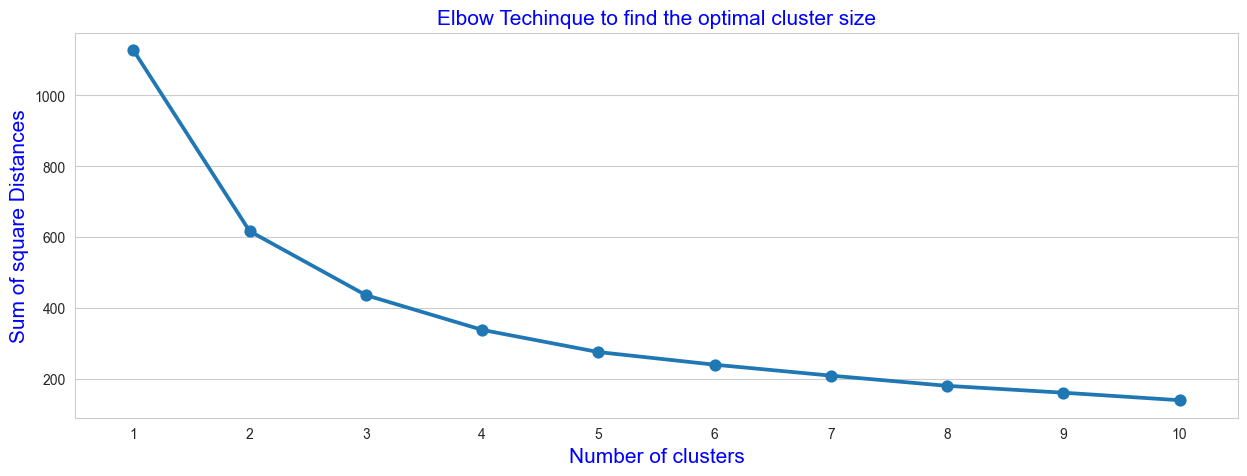

In [40]:
SS_distance = {}
for k in range(1,11):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(rfm_X)
    SS_distance[k] = mod.inertia_

plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters",size=15,color="blue")
plt.ylabel("Sum of square Distances", size=15,color="blue")
plt.title("Elbow Techinque to find the optimal cluster size",size=15,color="blue")

Chúng ta có thể quan sát thấy rằng khi số lượng cụm tăng lên thì tổng khoảng cách bình phương đang trở nên ít hơn.
Ta đếm các cụm mà khủyu tay uốn cong, ta chọn được 2 giá trị là k=3 và k=4. Để chắc chắn, chúng em sẽ kiểm tra lại với Silhouette Analysis

# Kiểm tra lại với Silhouette Analysis

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(rfm_X)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48594627354500886
For n_clusters=3, the silhouette score is 0.4054315049897069
For n_clusters=4, the silhouette score is 0.42659070911126973
For n_clusters=5, the silhouette score is 0.44870586717879035
For n_clusters=6, the silhouette score is 0.44648739047732583
For n_clusters=7, the silhouette score is 0.45616024397511457
For n_clusters=8, the silhouette score is 0.4066045287825571
For n_clusters=9, the silhouette score is 0.4670797749328047
For n_clusters=10, the silhouette score is 0.4253709161764327


In [ ]:
from sklearn.cluster import KMeans

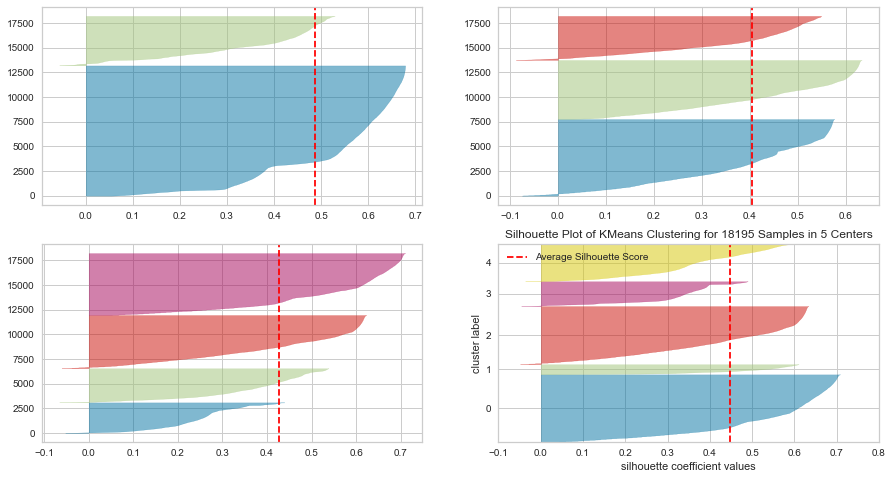

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18195 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:

    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_X)

visualizer.show()

In [ ]:
#Kmeans với k =3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(rfm_X)

KMeans(n_clusters=3)

In [ ]:
rfm['Clusters'] = model_clus3.labels_
rfm.head(20)

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11000,256,3,8248.99,1
11001,35,3,6383.88,1
11002,325,3,8114.04,1
11003,249,3,8139.29,1
11004,258,3,8196.01,1
11005,257,3,8121.33,1
11006,245,3,8119.03,1
11007,301,3,8211.00,1
11008,318,3,8106.31,1


In [ ]:
import plotly.express as px
fig = px.scatter_3d(rfm, x=rfm["Recency"], y=rfm["Frequency"], z=rfm["Monetary"], color=rfm["Clusters"])
fig.show()

# Phân tích các cụm theo K-means

In [ ]:
# Số lượng phần tử (khách hàng) trong từng cụm (cluster)


In [ ]:
rfm

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11000,256,3,8248.99,2
11001,35,3,6383.88,2
11002,325,3,8114.04,2
11003,249,3,8139.29,2
11004,258,3,8196.01,2
...,...,...,...,...
29478,202,1,2398.05,1
29479,497,1,2049.10,1
29480,181,1,2442.03,1


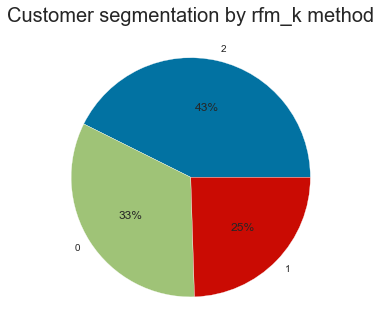

In [ ]:
fig = plt.pie(rfm.Clusters.value_counts(), labels=rfm.Clusters.value_counts().index,autopct='%.0f%%')
plt.title('Customer segmentation by rfm_k method', fontsize=20)
plt.set_cmap('winter')

In [ ]:
round(rfm.Clusters.value_counts())

2    7758
0    5979
1    4458
Name: Clusters, dtype: int64

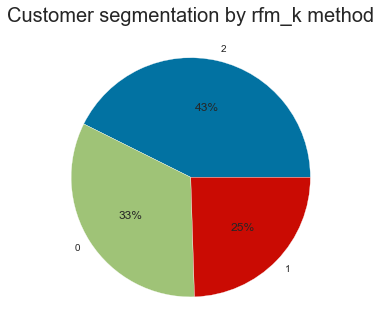

In [ ]:
fig = plt.pie(rfm.Clusters.value_counts(),labels= rfm.Clusters.value_counts().index,autopct='%.0f%%')
plt.title('Customer segmentation by rfm_k method', fontsize=20)
plt.set_cmap('winter')

In [ ]:
# Percentage (customers) by cluster
round(rfm.Clusters.value_counts(normalize=True)*100,0)

2    43.0
0    33.0
1    25.0
Name: Clusters, dtype: float64

In [ ]:
# Cluster 0

In [ ]:
# Cluster 0
df_0 = rfm[rfm['Clusters']==0]
df_0

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11014,259,2,138.45,0
11015,361,1,2500.97,0
11016,339,1,2332.28,0
11020,381,1,2316.97,0
11021,356,1,2371.96,0
...,...,...,...,...
29478,202,1,2398.05,0
29479,497,1,2049.10,0
29480,181,1,2442.03,0


In [ ]:
df_0.describe(percentiles = [0.25,0.50,0.75,0.85,0.97])

,Recency,Frequency,Monetary,Clusters
count,5979.000000,5979.000000,5979.000000,5979.0
mean,278.639405,1.084128,580.633778,0.0
std,82.440902,0.283564,837.224984,0.0
min,173.000000,1.000000,2.290000,0.0
25%,223.000000,1.000000,36.270000,0.0
50%,268.000000,1.000000,76.970000,0.0
75%,316.000000,1.000000,817.635000,0.0
85%,337.000000,1.000000,1764.960000,0.0
97%,462.660000,2.000000,2469.050000,0.0
max,846.000000,3.000000,3578.270000,0.0


In [ ]:
df_1 = rfm[rfm['Clusters']==1]
df_1

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11000,256,3,8248.99,1
11001,35,3,6383.88,1
11002,325,3,8114.04,1
11003,249,3,8139.29,1
11004,258,3,8196.01,1
...,...,...,...,...
29398,340,2,3964.47,1
29399,310,2,3936.47,1
29400,304,2,3992.46,1


In [ ]:
df_1.describe(percentiles = [0.25,0.50,0.75,0.85,0.99])

,Recency,Frequency,Monetary,Clusters
count,4458.000000,4458.000000,4458.000000,4458.0
mean,155.434724,2.304845,4737.254962,1.0
std,95.237895,0.601157,1772.259016,0.0
min,1.000000,2.000000,65.990000,1.0
25%,75.000000,2.000000,3338.382500,1.0
50%,146.000000,2.000000,4553.020000,1.0
75%,222.000000,2.000000,5955.230000,1.0
85%,266.000000,3.000000,6278.566500,1.0
99%,372.000000,5.000000,8632.261000,1.0
max,382.000000,6.000000,13295.380000,1.0


In [ ]:
df_2 = rfm[rfm['Clusters']==2]
df_2

,Recency,Frequency,Monetary,Clusters
CustomerKey,,,,
11012,91,2,81.26,2
11013,4,2,113.96,2
11023,8,2,122.24,2
11024,172,2,56.51,2
11043,149,2,47.98,2
...,...,...,...,...
29464,91,1,756.33,2
29465,86,1,791.32,2
29470,40,1,60.47,2


In [ ]:
df_2.describe(percentiles = [0.25,0.50,0.75,0.85,0.99])

,Recency,Frequency,Monetary,Clusters
count,7758.000000,7758.000000,7758.000000,7758.0
mean,83.239753,1.276489,491.880178,2.0
std,51.953523,0.519310,741.715029,0.0
min,1.000000,1.000000,2.290000,2.0
25%,38.000000,1.000000,39.980000,2.0
50%,79.000000,1.000000,83.470000,2.0
75%,126.000000,1.000000,597.950000,2.0
85%,148.000000,2.000000,1538.580000,2.0
99%,189.000000,3.000000,2457.330000,2.0
max,226.000000,3.000000,2663.690000,2.0


In [ ]:
rfm.groupby('Clusters').agg(
    {
        "Recency":"mean",
        "Frequency":"mean",
        "Monetary":"mean",
    })

,Recency,Frequency,Monetary
Clusters,,,
0,278.639405,1.084128,580.633778
1,155.434724,2.304845,4737.254962
2,83.239753,1.276489,491.880178


In [ ]:
rfm["Segment"] = np.where(rfm['Clusters'] == 2, "Medium value Customers",
(np.where(rfm['Clusters'] == 1, "High value Customers",
"Low Value Customers")))
rfm[['Recency',	'Frequency',	'Monetary','Clusters','Segment']].head(20)

,Recency,Frequency,Monetary,Clusters,Segment
CustomerKey,,,,,
11000,256,3,8248.99,1,High value Customers
11001,35,3,6383.88,1,High value Customers
11002,325,3,8114.04,1,High value Customers
11003,249,3,8139.29,1,High value Customers
11004,258,3,8196.01,1,High value Customers
11005,257,3,8121.33,1,High value Customers
11006,245,3,8119.03,1,High value Customers
11007,301,3,8211.00,1,High value Customers
11008,318,3,8106.31,1,High value Customers
